In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

In [75]:
data = pd.read_csv("dataset.csv")

In [76]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [78]:
data.shape

(614, 13)

In [79]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [80]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
data.fillna(method='ffill',inplace=True)
data.fillna(method='bfill',inplace=True)

In [82]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

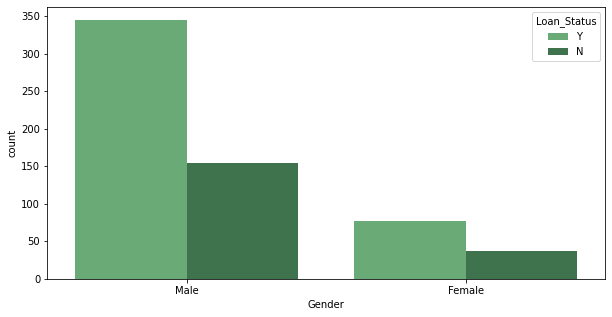

In [83]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=data,hue='Loan_Status',palette='Greens_d')
plt.show()

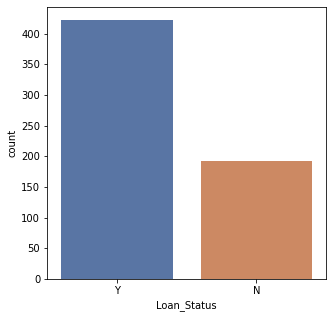

In [84]:
plt.figure(figsize=(5,5))
sns.countplot(x='Loan_Status',data=data,palette='deep')
plt.show()

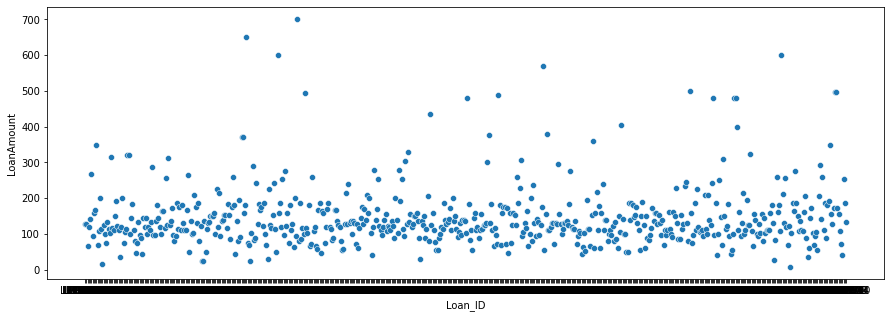

In [85]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Loan_ID",y="LoanAmount",data=data)
plt.show()

<Figure size 720x360 with 0 Axes>

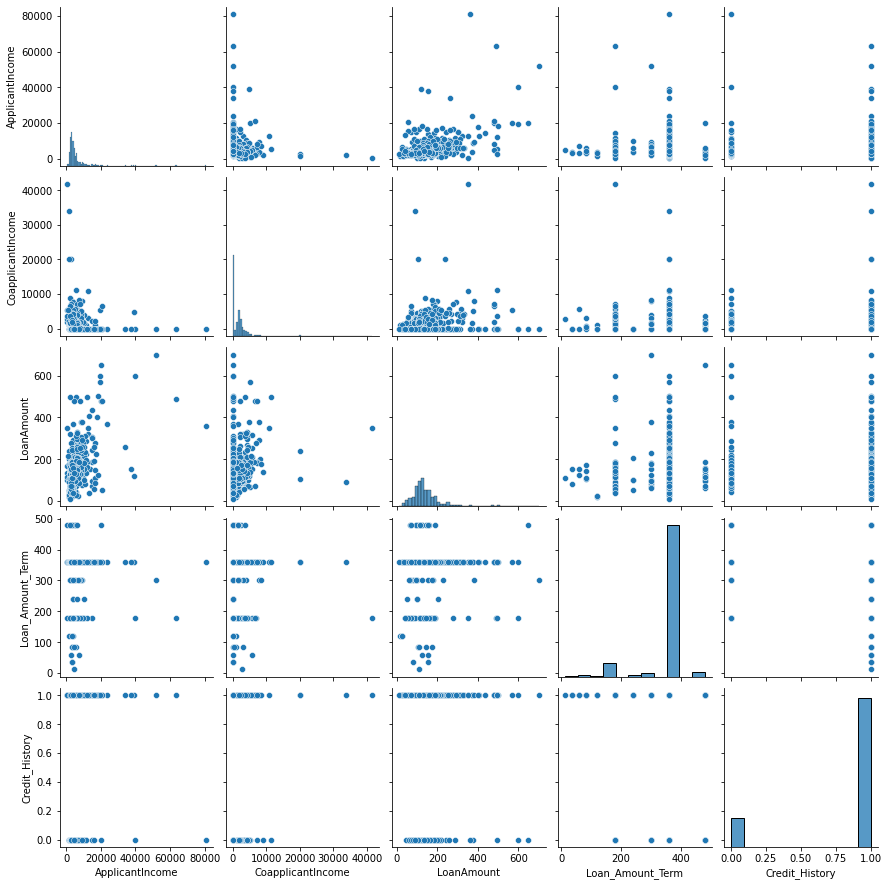

In [86]:
plt.figure(figsize=(10,5))
sns.pairplot(data)
plt.show()

In [87]:
data.drop('Dependents',axis=1,inplace=True)
data.drop('ApplicantIncome',axis=1,inplace=True)
data.drop('CoapplicantIncome',axis=1,inplace=True)
data.drop('LoanAmount',axis=1,inplace=True)
data.drop('Loan_Amount_Term',axis=1,inplace=True)
data.drop('Credit_History',axis=1,inplace=True)

In [88]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


In [89]:
df1=pd.get_dummies(data,columns=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"])
df1.head()

,Loan_ID,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,0,1,1,0,1,0,1,0,0,0,1,0,1
1,LP001003,0,1,0,1,1,0,1,0,1,0,0,1,0
2,LP001005,0,1,0,1,1,0,0,1,0,0,1,0,1
3,LP001006,0,1,0,1,0,1,1,0,0,0,1,0,1
4,LP001008,0,1,1,0,1,0,1,0,0,0,1,0,1


In [90]:
df1.drop('Gender_Female',axis=1,inplace=True)
df1.drop('Married_No',axis=1,inplace=True)
df1.drop('Education_Graduate',axis=1,inplace=True)
df1.drop('Self_Employed_No',axis=1,inplace=True)
df1.drop('Property_Area_Rural',axis=1,inplace=True)
df1.drop('Loan_Status_N',axis=1,inplace=True)

In [91]:
df1.head()

,Loan_ID,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,1,0,0,0,0,1,1
1,LP001003,1,1,0,0,0,0,0
2,LP001005,1,1,0,1,0,1,1
3,LP001006,1,1,1,0,0,1,1
4,LP001008,1,0,0,0,0,1,1


In [92]:
X = df1[["Gender_Male","Married_Yes","Education_Not Graduate","Self_Employed_Yes","Property_Area_Semiurban","Property_Area_Urban"]].values
y = df1["Loan_Status_Y"].values

In [93]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)
m1=LogisticRegression()
m1.fit(xtrain,ytrain)
yp1=m1.predict(xtest)

In [94]:
m2=DecisionTreeClassifier()
m2.fit(xtrain,ytrain)
yp2=m2.predict(xtest)

In [95]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix 
print("Logistic Regression :")
print("Accuracy is ",accuracy_score(ytest,yp1))
print("Precision score is ",precision_score(ytest,yp1))

Logistic Regression :
Accuracy is  0.7154471544715447
Precision score is  0.7310924369747899


In [96]:
print("Decision Tree Classifier :")
print("Accuracy is ",accuracy_score(ytest,yp2))
print("Precision score is ",precision_score(ytest,yp2))

Decision Tree Classifier :
Accuracy is  0.7317073170731707
Precision score is  0.7522123893805309


In [97]:
import pickle
pickle.dump(m2, open("decisionTreeModel.sav", 'wb'))

In [98]:
pickle.dump(m1, open("logisticRegressionModel.sav", 'wb'))